In [1]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from transformers import pipeline

# Create a QA pipeline with the default model (usually distilbert-base-cased-distilled-squad)
qa_pipeline = pipeline("question-answering")

context = """
Charles Babbage, an English mathematician, philosopher, inventor and mechanical engineer, originated the concept of a programmable computer.
"""

question = "Who is known as the father of the computer?"

result = qa_pipeline(question=question, context=context)
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


{'score': 0.9900437593460083, 'start': 1, 'end': 16, 'answer': 'Charles Babbage'}


In [3]:
qa_pipeline_custom = pipeline("question-answering", model="deepset/roberta-base-squad2")

result_custom = qa_pipeline_custom(question=question, context=context)
print(result_custom)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cpu


{'score': 0.25067025423049927, 'start': 1, 'end': 16, 'answer': 'Charles Babbage'}


In [4]:
my_context = """
Neural networks are a subset of machine learning algorithms inspired by the human brain. They are widely used in computer vision and natural language processing tasks.
"""

questions = [
    "What are neural networks inspired by?",
    "Where are neural networks commonly used?"
]

for q in questions:
    result = qa_pipeline_custom(question=q, context=my_context)
    print(f"Question: {q}")
    print(result)
    print()

Question: What are neural networks inspired by?
{'score': 0.5664832592010498, 'start': 73, 'end': 88, 'answer': 'the human brain'}

Question: Where are neural networks commonly used?
{'score': 0.74064701795578, 'start': 114, 'end': 167, 'answer': 'computer vision and natural language processing tasks'}



In [5]:
#2.Digit-Class Controlled Image Generation with Conditional GAN
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

mnist = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(mnist, batch_size=128, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 33.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.01MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.33MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.18MB/s]


In [7]:
class Generator(nn.Module):
    def __init__(self, noise_dim, label_dim, img_dim):
        super().__init__()
        self.label_embed = nn.Embedding(10, label_dim)
        self.model = nn.Sequential(
            nn.Linear(noise_dim + label_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, img_dim),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_embed = self.label_embed(labels)
        x = torch.cat([noise, label_embed], dim=1)
        return self.model(x)

In [8]:
class Discriminator(nn.Module):
    def __init__(self, img_dim, label_dim):
        super().__init__()
        self.label_embed = nn.Embedding(10, label_dim)
        self.model = nn.Sequential(
            nn.Linear(img_dim + label_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        label_embed = self.label_embed(labels)
        x = torch.cat([img, label_embed], dim=1)
        return self.model(x)

In [9]:
# Define the device to use (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

generator = Generator(noise_dim=100, label_dim=10, img_dim=28*28).to(device)
discriminator = Discriminator(img_dim=28*28, label_dim=10).to(device)

loss_fn = nn.BCELoss()
optim_G = torch.optim.Adam(generator.parameters(), lr=0.0002)
optim_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002)

# You also need to define num_epochs, which is used in the loop
num_epochs = 100 # Or whatever number of epochs you want to train for

for epoch in range(num_epochs):
    for real_imgs, labels in dataloader:
        real_imgs = real_imgs.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Train Discriminator
        noise = torch.randn(real_imgs.size(0), 100).to(device)
        fake_labels = torch.randint(0, 10, (real_imgs.size(0),)).to(device)
        fake_imgs = generator(noise, fake_labels)

        real_validity = discriminator(real_imgs, labels)
        fake_validity = discriminator(fake_imgs.detach(), fake_labels)

        d_loss = loss_fn(real_validity, torch.ones_like(real_validity)) + \
                 loss_fn(fake_validity, torch.zeros_like(fake_validity))
        optim_D.zero_grad()
        d_loss.backward()
        optim_D.step()

        # Train Generator
        fake_validity = discriminator(fake_imgs, fake_labels)
        g_loss = loss_fn(fake_validity, torch.ones_like(fake_validity))
        optim_G.zero_grad()
        g_loss.backward()
        optim_G.step()

In [10]:
def show_generated_digits(generator, device):
    generator.eval()
    num_classes = 10
    noise = torch.randn(num_classes, 100).to(device)
    labels = torch.arange(0, 10).to(device)
    with torch.no_grad():
        images = generator(noise, labels).view(-1, 1, 28, 28)
        images = (images + 1) / 2.0  # unnormalize

    grid = torchvision.utils.make_grid(images, nrow=10)
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.title("Generated Digits 0–9 (Conditional GAN)")
    plt.axis('off')
    plt.show()

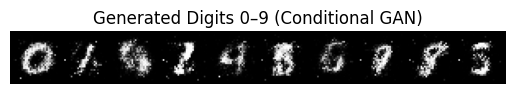

In [11]:
show_generated_digits(generator, device)


In [ ]:
"""

**• How does a Conditional GAN differ from a vanilla GAN?**
A Conditional GAN (cGAN) differs from a vanilla GAN by introducing *extra information* (like class labels or attributes) into both the generator and discriminator. This allows the generator to produce outputs *conditioned* on the input label, giving control over what is generated.

**Real-world application:** In medical imaging, cGANs can generate MRI scans conditioned on specific diagnoses (e.g., generating brain scans showing signs of tumors), enabling controlled data augmentation for rare cases.

---

**• What does the discriminator learn in an image-to-image GAN?**
In an image-to-image GAN (like Pix2Pix), the discriminator learns to distinguish *pairs* of images—specifically, whether the **output image is a realistic transformation of the input image**. It's not just about realism but also *fidelity to the input*.

**Why is pairing important?**
Pairing ensures that the generated image aligns correctly with the corresponding input (e.g., turning a sketch into a realistic photo). Without pairs, the model might generate plausible images that don't correspond to the input intent.

